In [ ]:
import pandas as pd
import os

input_dir = './'  

results_list = []

for year in range(2015, 2025):
    file_path = os.path.join(input_dir, f'{year}_report.csv')
    
    # data of the year
    yearly_data = pd.read_csv(file_path)
    
    # max and min happiness score of the year
    max_row = yearly_data.loc[yearly_data['happiness_score'].idxmax()]
    min_row = yearly_data.loc[yearly_data['happiness_score'].idxmin()]
    
    results_list.append({
        'Year': year,
        'Top Country': max_row['country'],
        'Max Score': max_row['happiness_score'],
        'Bottom Country': min_row['country'],
        'Min Score': min_row['happiness_score']
    })

results = pd.DataFrame(results_list)
print(results)

   Year  Top Country  Max Score Bottom Country  Min Score
0  2015       Norway     7.5370        Burundi     2.9050
1  2016  Switzerland     7.5870           Togo     2.8390
2  2017      Finland     7.7690    Afghanistan     3.2030
3  2018      Finland     7.6320        Burundi     2.9050
4  2019      Denmark     7.5260        Burundi     2.9050
5  2020      Finland     7.8087    Afghanistan     2.5669
6  2021      Finland     7.8421    Afghanistan     2.5229
7  2022      Finland     7.8210    Afghanistan     2.4038
8  2023      Finland     7.8042    Afghanistan     1.8590
9  2024      Finland     7.7407    Afghanistan     1.7210


In [2]:
import matplotlib.pyplot as plt

def plot_score_rank(country):
    scores = []
    years = []

    for year in range(2015, 2025):
        file_path = os.path.join(input_dir, f'{year}_report.csv')
        yearly_data = pd.read_csv(file_path)
        row = yearly_data[yearly_data['country'] == country]
        if not row.empty:
            scores.append(row['happiness_score'].values[0])
            years.append(year)

    ranks = []

    for year in range(2015, 2025):
        file_path = os.path.join(input_dir, f'{year}_report.csv')
        yearly_data = pd.read_csv(file_path)
        yearly_data = yearly_data.sort_values(by='happiness_score', ascending=False).reset_index(drop=True)
        rank = yearly_data[yearly_data['country'] == country].index.values
        if len(rank) > 0:
            ranks.append(rank[0] + 1) 

    # plot the happiness score and rank
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # left axis for the happiness score
    ax1.plot(years, scores, marker='o', label='Happiness Score', color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Happiness Score', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # right axis for the rank
    ax2 = ax1.twinx()
    ax2.plot(years, ranks, marker='s', label='Rank', color='red')
    ax2.set_ylabel('Rank', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.invert_yaxis()  # reverse the right axis

    plt.title(f'Happiness Score and Rank of {country} (2015-2024)')
    fig.tight_layout()
    plt.show()


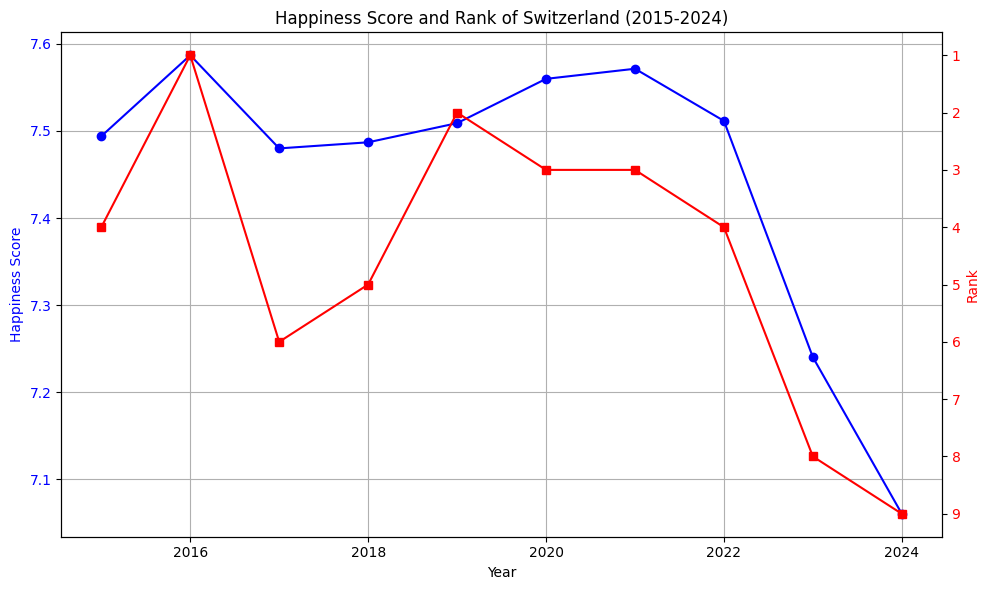

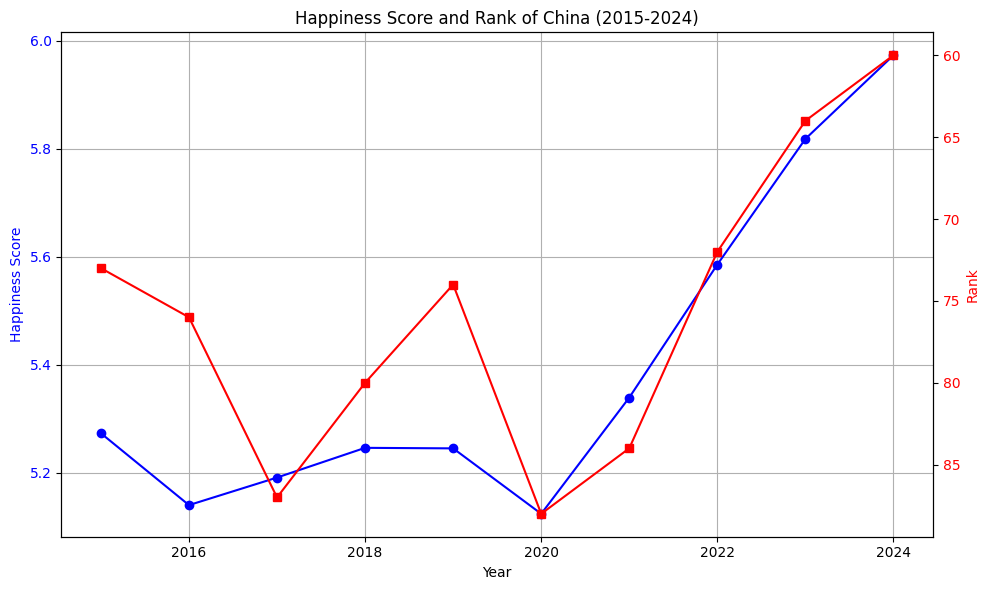

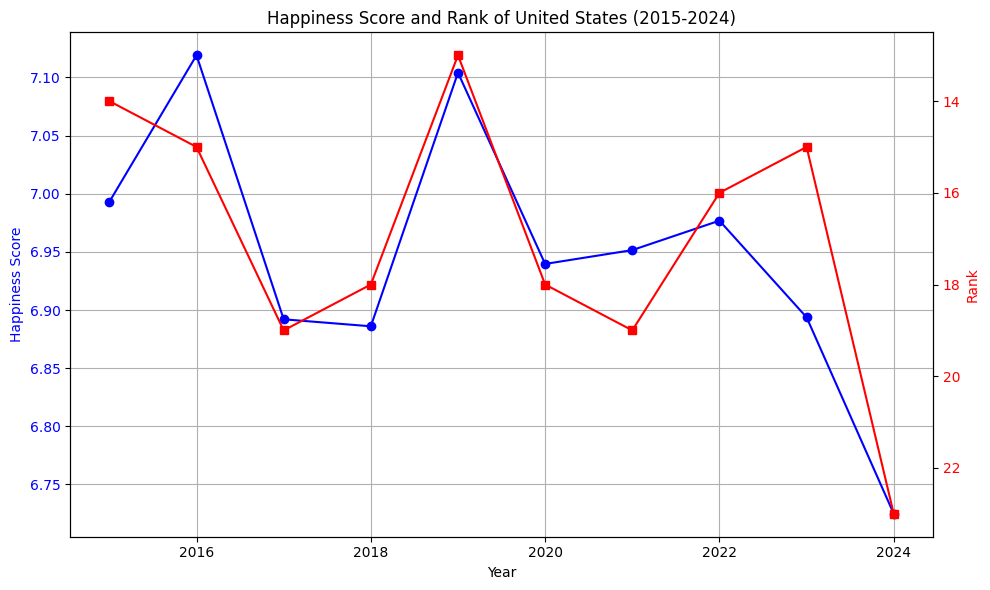

In [3]:
plot_score_rank("Switzerland")
plot_score_rank("China")
plot_score_rank("United States")

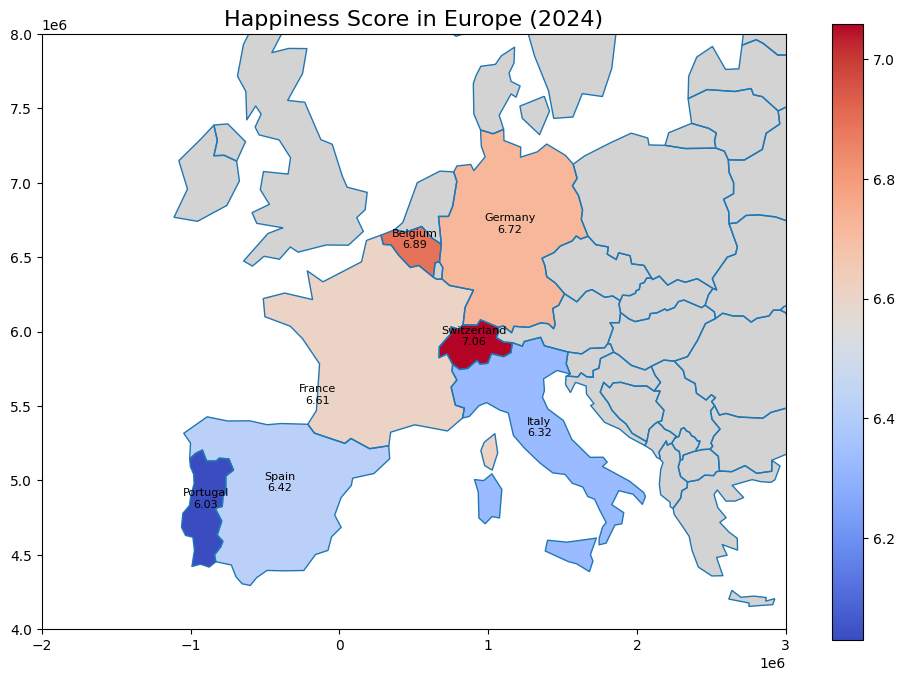

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

shapefile_path = 'natural_earth_vector/110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# filter out the countries in Europe
europe = world[world['CONTINENT'] == 'Europe']

# example countries to plot
countries_to_plot = ['Switzerland', 'Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Belgium']
year = 2024
input_dir = './' 
file_path = os.path.join(input_dir, f'{year}_report.csv')

# data of 2024
yearly_data = pd.read_csv(file_path)

# filter out the data of countries in the example list
european_data = yearly_data[yearly_data['country'].isin(countries_to_plot)][['country', 'happiness_score']]

# merge the shapefile data with the example data
europe = europe.merge(european_data[['country', 'happiness_score']], left_on='NAME', right_on='country', how='left')

# cast the coordinate reference system to Web Mercator
europe = europe.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# set the range of longitude and latitude
xlim = (-2000000, 3000000)  
ylim = (4000000, 8000000) 

europe.boundary.plot(ax=ax, linewidth=1)
europe.plot(column='happiness_score', ax=ax, legend=True, cmap='coolwarm', missing_kwds={"color": "lightgrey"})

for x, y, label, score in zip(europe.geometry.centroid.x, europe.geometry.centroid.y, europe['NAME'], europe['happiness_score']):
    if not pd.isna(score):
        ax.text(x, y, f"{label}\n{score:.2f}", fontsize=8, ha='center', color='black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('Happiness Score in Europe (2024)', fontsize=16)
plt.show()